## Importação do [dataset do Kaggle](https://www.kaggle.com/datasets/steubk/wikiart)

In [161]:
# instalação da lib do Kaggle (kagglehub) para realizar download
# !pip install kagglehub

In [162]:
# imports utilizados no código
import kagglehub
import pandas as pd
import os
import numpy
import matplotlib.pyplot as plt

In [163]:
# path = kagglehub.dataset_download("steubk/wikiart")
# print("Path to dataset files:", path) # Path to dataset files: /root/.cache/kagglehub/datasets/steubk/wikiart/versions/1

In [164]:
# classes.csv
path = '/root/.cache/kagglehub/datasets/steubk/wikiart/versions/1'
dataset_path = os.path.join(path, 'classes.csv')
df = pd.read_csv(dataset_path)

## Exploração do dataset, suas colunas e informações

In [165]:
df.head()

,filename,artist,genre,description,phash,width,height,genre_count,subset
0,Abstract_Expressionism/aaron-siskind_acolman-1...,aaron siskind,['Abstract Expressionism'],acolman-1-1955,bebbeb018a7d80a8,1922,1382,1,train
1,Abstract_Expressionism/aaron-siskind_chicago-6...,aaron siskind,['Abstract Expressionism'],chicago-6-1961,d7d0781be51fc00e,1382,1746,1,train
2,Abstract_Expressionism/aaron-siskind_glouceste...,aaron siskind,['Abstract Expressionism'],gloucester-16a-1944,9f846e5a6c639325,1382,1857,1,train
3,Abstract_Expressionism/aaron-siskind_jerome-ar...,aaron siskind,['Abstract Expressionism'],jerome-arizona-1949,a5d691f85ac5e4d0,1382,1849,1,train
4,Abstract_Expressionism/aaron-siskind_kentucky-...,aaron siskind,['Abstract Expressionism'],kentucky-4-1951,880df359e6b11db1,1382,1625,1,train


In [166]:
df.info(), df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80042 entries, 0 to 80041
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   filename     80042 non-null  object
 1   artist       80042 non-null  object
 2   genre        80042 non-null  object
 3   description  80042 non-null  object
 4   phash        80042 non-null  object
 5   width        80042 non-null  int64 
 6   height       80042 non-null  int64 
 7   genre_count  80042 non-null  int64 
 8   subset       80042 non-null  object
dtypes: int64(3), object(6)
memory usage: 5.5+ MB


(None,
 Index(['filename', 'artist', 'genre', 'description', 'phash', 'width',
        'height', 'genre_count', 'subset'],
       dtype='object'))

In [167]:
df['subset'].value_counts()

,count
subset,
train,63998
test,16000
uncertain artist,44


In [168]:
df['artist'].value_counts()

,count
artist,
vincent van gogh,1888
nicholas roerich,1816
pierre auguste renoir,1399
claude monet,1334
pyotr konchalovsky,924
...,...
lygia pape,1
kurt schwitters,1
antoni tapies,1


In [169]:
# df['genre'].value_counts().tail(25)
df['genre'].value_counts()

,count
genre,
['Impressionism'],12847
['Realism'],10534
['Romanticism'],6896
['Expressionism'],6280
['Post Impressionism'],6274
...,...
"['Naive Art Primitivism', 'Naive Art Primitivism']",1
"['Naive Art Primitivism', 'Realism']",1
"['Fauvism', 'Abstract Expressionism']",1


## Exclusão de instâncias com mais de uma classificação

In [170]:
# para reconhecer que há mais de uma classificação na instância: apresentar caractere vírgula

# verifica presença de vírgula para cada instância do df
result = df['genre'].apply(lambda x: ',' in x)
# inverte os resultados (quando há vírgula, temos False; quando não há vírgula, temos True)
df = df[~result] # novo df apresenta instâncias com uma classificação apenas

len(df), df['genre'].value_counts()

(78642,
 genre
 ['Impressionism']                 12847
 ['Realism']                       10534
 ['Romanticism']                    6896
 ['Expressionism']                  6280
 ['Post Impressionism']             6274
 ['Baroque']                        4202
 ['Symbolism']                      4174
 ['Art Nouveau Modern']             4155
 ['Abstract Expressionism']         2574
 ['Northern Renaissance']           2550
 ['Naive Art Primitivism']          2299
 ['Rococo']                         2070
 ['Cubism']                         2002
 ['Color Field Painting']           1486
 ['Pop Art']                        1447
 ['Early Renaissance']              1387
 ['High Renaissance']               1339
 ['Mannerism Late Renaissance']     1275
 ['Minimalism']                     1250
 ['Ukiyo e']                        1159
 ['Fauvism']                         747
 ['Pointillism']                     490
 ['Contemporary Realism']            481
 ['New Realism']                     312
 

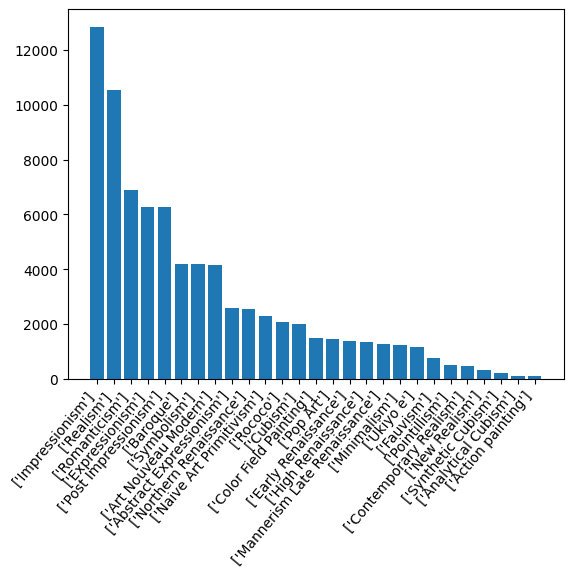

In [171]:
count_values = df['genre'].value_counts()
keys = []
values = []

# chaves e valores guardados em listas
for key, value in count_values.items():
  keys.append(key)
  values.append(value)

# visualizando graficamente

fig, ax = plt.subplots()
# nomes das classes no eixo x; quantidades das instâncias dessas classes no eixo y
ax.bar(keys, values)
# configura rotação dos nomes para melhorar legibilidade
plt.xticks(rotation=50, ha='right')
plt.show() # exibe

## Preparação do Dataset

A distribuição das classes está desbalanceada. Para não gerar overfitting no modelo, vamos equilibrar as quantidades de instâncias das classes.

In [172]:
df_train = df[df['subset'] == 'train']
df_test = df[df['subset'] == 'test']

## [Computer Vision Course - Hugging Face](https://huggingface.co/learn/computer-vision-course/en/unit0/welcome/welcome)

### Contextualização e introdução a elementos básicos de Visão Computacional

##### Introdução

- A visão humana trabalha com a 'entrada' de uma imagem e extração de informações dessa entrada. Visão Computacional é uma tarefa semelhante, mas pode ser muito mais abrangente!
- Como é o reconhecimento de bolas usadas em esportes (humanos X computadores)? Essa é uma tarefa que envolve uma análise do contexto geral em que essa bola está inserida, e a classificação exata depende muito do local em que essa bola está inserida, e é aí que entra o uso de Inteligência Artificial!
- O uso de programação pura para realizar uma detecção desse tipo é muito difícil, pois o contexto é muito significativo nessa questão (e em várias outras). Em tarefas assim, existe a necessidade de sistemas mais robustos. Por isso Visão Computacional está estreitamente relacionada a IA!

##### Imagens

- Imagens como funções de N dimensões; pensando em 2 dimensões, cada par de coordenadas xi, yi é um elemento da imagem (pixel, picture element) e a amplitude de F para essa coordenad indica o nível de cinza no ponto. Pensando em cores, cada canal da imagem é uma diferente componente de cor dessa imagem e temos um F pra cada componente de cor (referenciando F(x, y)). Também há outros tipos de imagem em que a função F traz um label para os pixels.
- Comumente, os computadores 'visualizam' imagens como matrizes (um array numérico de duas dimensões)!
- Vídeos: adicionamos uma terceira dimensão à função F e incluímos a dimensão do tempo (F(x, y, t)).

...


---

### Redes Neurais Convolucionais (Convolutional Neural Networks - CNNs)

##### Convolução
- Convolução: uma janela com números que atravessa os dados e realiza uma multiplicação e soma desses valores; o resultado desse filtro é a taxa de variação dos dados (derivada!). Essa ideia é a base dos filtros em PDI (filtro de Prewitt, Sobel etc.).

##### CNNs
- A ideia é utilizar filtros para extrair informações de imagens e, como alguns filtros funcionam melhor ou pior com certas imagens, definir os filtros ótimos que conseguem extrair informações importantes
- Muitas vezes, interessa-nos apenas as bordas detectadas em uma imagem. Assim, para 'resumir' uma imagem, realizamos 'pooling' e temos menos parâmetros e ainda assim temos as informações necessárias para trabalhar. Assim, pooling é a operação de obter o elemento de valor mais importante no feature map.